In [2]:
import pandas as pd

df1 = pd.read_csv("/Users/farah/Users/farah/IdeaProjects/RecruitmentAgent/data/resumes.csv")
df2 = pd.read_csv("/Users/farah/Users/farah/IdeaProjects/RecruitmentAgent/data/tech_resumes1.csv")
df1 = df1.rename(columns={"Resume_str": "text"})
df2 = df2.rename(columns={"Resume": "text"})   # repeat for other names


In [3]:
import re

def clean_resume(text):
    if pd.isna(text):
        return ""
    # Remove lines that are ALL CAPS job titles
    return re.sub(r"^[A-Z ]{3,}\n", "", text.strip())
    
df1["text"] = df1["text"].apply(clean_resume)
df2["text"] = df2["text"].apply(clean_resume)
df1["source"] = "resume_csv"
df2["source"] = "tech_resumes1_csv"



In [4]:
df2.head()

,Category,text,source
0,Data Science,Skills Programming Languages Python pandas nu...,tech_resumes1_csv
1,Data Science,Education Details May 2013 to May 2017 BE UI...,tech_resumes1_csv
2,Data Science,Areas of Interest Deep Learning Control System...,tech_resumes1_csv
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...,tech_resumes1_csv
4,Data Science,Education Details MCA YMCAUST Faridabad H...,tech_resumes1_csv


In [13]:
rag_df = pd.concat([df1, df2], ignore_index=True)
rag_df["id"] = rag_df.index.astype(str)
rag_df = rag_df[["id", "text", "Category", "source"]]
rag_df.to_csv("rag_corpus.csv", index=False)

In [15]:
rag_df.tail()

,id,text,Category,source
3441,3441,Computer Skills Proficient in MS office Word ...,Testing,tech_resumes1_csv
3442,3442,Willingness to accept the challenges Positive...,Testing,tech_resumes1_csv
3443,3443,PERSONAL SKILLS Quick learner Eagerness to l...,Testing,tech_resumes1_csv
3444,3444,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Po...,Testing,tech_resumes1_csv
3445,3445,Skill Set OS Windows XP788110 Database MYSQL s...,Testing,tech_resumes1_csv


In [5]:
df2["id"] = df2.index.astype(str)
df2 = df2[["id", "text", "Category", "source"]]
df2.head()

,id,text,Category,source
0,0,Skills Programming Languages Python pandas nu...,Data Science,tech_resumes1_csv
1,1,Education Details May 2013 to May 2017 BE UI...,Data Science,tech_resumes1_csv
2,2,Areas of Interest Deep Learning Control System...,Data Science,tech_resumes1_csv
3,3,Skills R Python SAP HANA Tableau SAP HANA...,Data Science,tech_resumes1_csv
4,4,Education Details MCA YMCAUST Faridabad H...,Data Science,tech_resumes1_csv


In [7]:
df2.shape

(962, 4)

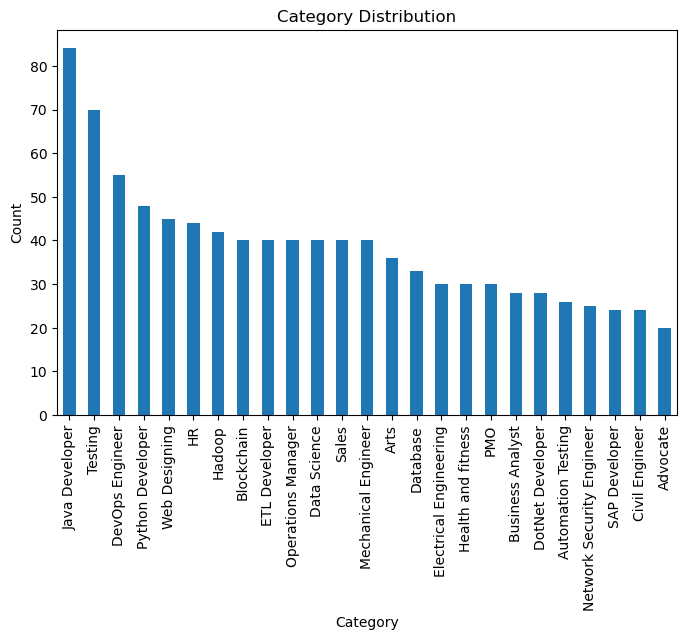

In [9]:
import matplotlib.pyplot as plt

# Count occurrences
category_counts = df2["Category"].value_counts()

# Plot
plt.figure(figsize=(8,5))
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.show()


In [10]:
arr = df2["Category"].unique()
arr

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [12]:
keep_cats = [
    'Data Science', 'Web Designing', 'Java Developer', 'Business Analyst',
    'SAP Developer', 'Automation Testing', 'Python Developer',
    'DevOps Engineer', 'Network Security Engineer', 'Database',
    'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing', 'HR'
]
df_filtered = df2[df2["Category"].isin(keep_cats)]

In [16]:
rag_df = rag_df.dropna()

In [15]:
n = 5  # number of samples you want per category

sampled_df = df_filtered.groupby("Category").sample(n=n, random_state=42)
sampled_df.shape

(80, 4)

In [16]:
sampled_df.to_csv("tech_corpus.csv", index=False)